In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the warnings module to handle warnings
import warnings

# Suppressing all warnings within the context
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
tranning_data = pd.read_csv('../dataset/final_dataset/gkm/train.csv')

# tranning_data = tranning_data.sample(frac = 0.10)
tranning_data.shape

(14442, 18)

In [3]:
# Load the dataset from a CSV file into a pandas DataFrame
testing_data = pd.read_csv('../dataset/final_dataset/gkm/test.csv')

testing_data.shape

(3611, 18)

# spliting dataset in to train and test sets 

In [4]:
def x_y_split(df):
    
    # Separate the features and the target variable
    # 'X' will contain all columns except 'magnitude'
    X = df[['latitude', 'longitude', 'depth', 'distance', 'gravity','force','mb', 'mwb', 'mwc','mwr', 'mww', 'rare_mt']]
    
    # 'y' will contain only the 'magnitude' column
    y = df['magnitude']
    return X, y



In [5]:
tranning_data

,latitude,longitude,depth,magnitude,distance,gravity,force,year,month,day,hour,minutes,mb,mwb,mwc,mwr,mww,rare_mt
0,-6.7306,155.0899,3.555348,5.1,12.808255,2.280247,46.837415,2014,12,23,21,19,1,0,0,0,0,0
1,2.4210,90.4340,3.430756,5.1,12.866583,2.282207,46.720759,2012,12,6,2,24,1,0,0,0,0,0
2,-20.3307,-173.8138,2.302585,5.1,12.821645,2.281148,46.810636,2021,2,3,11,11,1,0,0,0,0,0
3,-59.4030,-17.9994,2.302585,5.9,12.913470,2.280851,46.626985,2023,3,3,4,53,0,0,0,0,1,0
4,-54.3240,159.1913,2.302585,5.1,12.865658,2.280331,46.722609,2017,6,1,20,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,5.7531,61.3264,2.302585,5.4,12.821045,2.280327,46.811836,2014,11,28,13,23,0,0,1,0,0,0
14438,44.0505,148.1035,3.367296,5.9,12.863841,2.282966,46.726243,2016,10,23,20,25,0,0,0,0,1,0
14439,8.5266,126.4161,3.688879,7.6,12.902644,2.283954,46.648637,2023,12,2,14,37,0,0,0,0,1,0
14440,-53.1275,-117.7908,2.302585,5.4,12.883997,2.283723,46.685931,2023,12,27,15,36,0,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Split the dataset into training and testing sets
X, y = x_y_split(tranning_data)
X_eval, y_eval = x_y_split(testing_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize scalers
scaler = StandardScaler()
# mm_scaler = MinMaxScaler()

In [7]:
## Fit and transform for the training data
# st_scaler.fit(X_train.drop(columns=['depth', 'distance', 'gravity', 'force']))
# st_train_df = pd.DataFrame(st_scaler.transform(X_train.drop(columns=['depth', 'distance', 'gravity', 'force'])), columns=X_train.drop(columns=['depth', 'distance', 'gravity', 'force']).columns)
# st_test_df = pd.DataFrame(st_scaler.transform(X_test.drop(columns=['depth', 'distance', 'gravity', 'force'])), columns=X_test.drop(columns=['depth', 'distance', 'gravity', 'force']).columns)
# st_eval_df = pd.DataFrame(st_scaler.transform(X_eval.drop(columns=['depth', 'distance', 'gravity', 'force'])), columns=X_eval.drop(columns=['depth', 'distance', 'gravity', 'force']).columns)

# mm_scaler.fit(X_train[['depth', 'distance', 'gravity', 'force']])
# mm_train_df = pd.DataFrame(mm_scaler.transform(X_train[['depth', 'distance', 'gravity', 'force']]), columns=['depth', 'distance', 'gravity', 'force'])
# mm_test_df = pd.DataFrame(mm_scaler.transform(X_test[['depth', 'distance', 'gravity', 'force']]), columns=['depth', 'distance', 'gravity', 'force'])
# mm_eval_df = pd.DataFrame(mm_scaler.transform(X_eval[['depth', 'distance', 'gravity', 'force']]), columns=['depth', 'distance', 'gravity', 'force'])

## Concatenate the scaled columns with the rest of the DataFrame
# X_train_scaled = pd.concat([st_train_df.reset_index(drop=True), mm_train_df.reset_index(drop=True)], axis=1)
# X_test_scaled = pd.concat([st_test_df.reset_index(drop=True), mm_test_df.reset_index(drop=True)], axis=1)
# X_eval_scaled = pd.concat([st_eval_df.reset_index(drop=True), mm_eval_df.reset_index(drop=True)], axis=1)

In [8]:
X_eval.head()

,latitude,longitude,depth,distance,gravity,force,mb,mwb,mwc,mwr,mww,rare_mt
0,9.6670,122.2750,2.302585,12.833072,2.283209,46.787781,1,0,0,0,0,0
1,56.3385,-156.4799,3.956996,12.867719,2.280484,46.718488,0,0,0,0,1,0
2,-4.7750,133.8946,2.302585,12.909890,2.280320,46.634145,0,0,0,0,1,0
3,32.2813,105.0428,2.302585,12.896115,2.281854,46.661695,0,0,0,0,1,0
4,-14.6987,167.8085,1.935860,12.817595,2.280711,46.818736,0,0,0,0,1,0


In [9]:
# Print the scaled DataFrames
X_train.shape

(10109, 12)

In [10]:
X_test.head()

,latitude,longitude,depth,distance,gravity,force,mb,mwb,mwc,mwr,mww,rare_mt
11939,43.9146,148.6452,2.302585,12.820501,2.281630,46.812923,0,0,0,0,1,0
14088,-27.4594,-176.4619,2.302585,12.824731,2.281776,46.804464,0,0,0,0,1,0
9932,38.4334,44.9458,2.949793,12.814174,2.280739,46.825578,0,0,0,0,1,0
8170,-5.7003,151.1053,3.713572,12.909870,2.282329,46.634184,0,0,0,0,1,0
7826,-3.7553,151.3021,2.302585,12.829773,2.280408,46.794379,0,0,0,0,1,0


In [11]:
# import models for training 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### model 1: Random forest regressor

In [12]:
# Model 1: Set up the pipeline and parameter grid for random forest regressor
random_forest_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Initialize GridSearchCV
rfr_grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to  data
rfr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=2, rf__min_samples_split=2, rf__n_estimators=300; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   4.9s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   4.3s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__

/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   0.0s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=auto, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__n_estimators=100; total time=   0.0s
[CV] END rf__bootstrap=True,

/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
399 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 889, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1514, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True, False],
                         'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

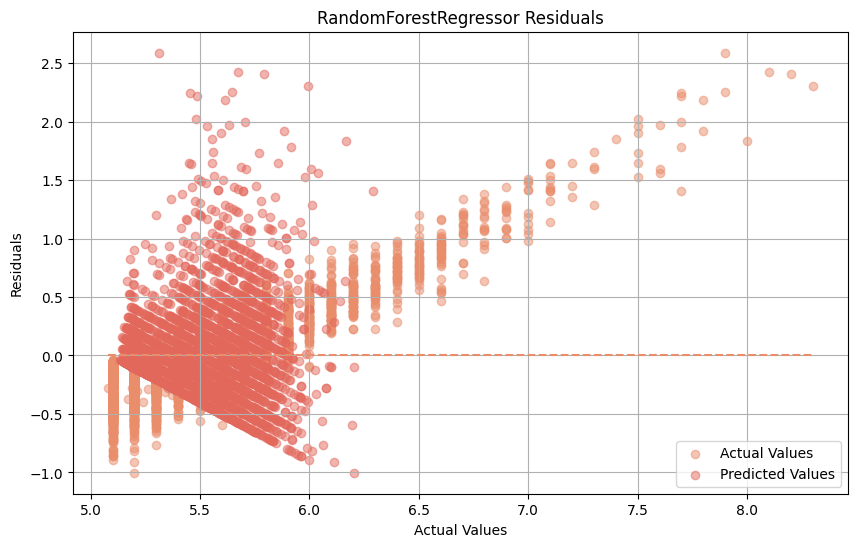

{'model_name': 'RandomForestRegressor',
 'params': {'rf__bootstrap': True,
  'rf__max_depth': 20,
  'rf__max_features': 'sqrt',
  'rf__min_samples_leaf': 4,
  'rf__min_samples_split': 2,
  'rf__n_estimators': 300},
 'test_mse': 0.12792144204864145,
 'mae': 0.23961713363765305,
 'r2': 0.2812322380586324}

In [13]:
def evaluate_grid_search(grid_search, X_test, y_test):
    # Evaluate on the test set
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the model name and best parameters
    model_name = type(best_pipeline.named_steps[list(best_pipeline.named_steps.keys())[-1]]).__name__
    best_params = grid_search.best_params_

        # Calculate residuals
    residuals = y_test - y_pred
        # Plot residuals
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals, alpha=0.5, color=sns.set_palette('flare'), label='Actual Values')
    plt.scatter(y_pred, residuals, alpha=0.5, color=sns.set_palette('flare'), label='Predicted Values')
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors=sns.set_palette('flare'), linestyles='dashed')
    plt.title(f'{model_name} Residuals')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)
    plt.show()
    return {
        'model_name': model_name,
        'params': best_params,
        'test_mse': test_mse,
        'mae': mae,
        'r2': r2
    }



evaluate_grid_search(rfr_grid_search, X_test, y_test)

#### model 2: SVR

In [ ]:
# model 2: Set up the pipeline and parameter grid for support vector regressor
svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize GridSearchCV
svr_grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to data
svr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
evaluate_grid_search(svr_grid_search, X_test, y_test)


#### model 3: gradient boost regressor

In [ ]:
#Model 3: Set up the pipeline and parameter grid gradient boost regressor
gradient_boosting_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'gbr__n_estimators': [100, 200, 300],
    'gbr__learning_rate': [0.01, 0.1, 0.2],
    'gbr__max_depth': [3, 4, 5],
    'gbr__min_samples_split': [2, 5, 10],
    'gbr__min_samples_leaf': [1, 2, 4],
    'gbr__subsample': [0.8, 0.9, 1.0]
}

# Step 5: Initialize GridSearchCV
gbr_grid_search = GridSearchCV(estimator=gradient_boosting_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Step 6: Fit GridSearchCV to your data
gbr_grid_search.fit(X_train, y_train)

In [ ]:
evaluate_grid_search(gbr_grid_search, X_test, y_test)

#### model 4: ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define the ANN model
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='linear'))  # Output layer for regression
    return model

# Build the model
input_dim = X_train.shape[1]
ann_model = build_ann_model(input_dim)

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
test_mse, test_mae = ann_model.evaluate(X_test, y_test)
# Predict and calculate R-Squared
y_pred = ann_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

# Store ANN results
ann_results = {
    'model_name': 'ArtificialNeuralNetwork',
    'params': {'epochs': 100, 'batch_size': 32, 'optimizer': 'adam'},
    'test_mse': test_mse,
    'mae': test_mae,
    'r2': r2
}

In [ ]:
ann_results

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi = 200)

# Plot the training and validation loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot the training and validation mean absolute error
axes[1].plot(history.history['mean_absolute_error'], label='Training MAE')
axes[1].plot(history.history['val_mean_absolute_error'], label='Validation MAE')
axes[1].set_title('Training and Validation Mean Absolute Error')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

#### Compairing models performance

In [ ]:
# Compairing the model based on their results.

In [ ]:
svr_results = evaluate_grid_search(svr_grid_search, X_test, y_test)
gbr_results = evaluate_grid_search(rfr_grid_search, X_test, y_test)
rfr_results = evaluate_grid_search(gbr_grid_search, X_test, y_test)

# Combine all results into a DataFrame
all_results = [svr_results, gbr_results, rfr_results, ann_results]
df_results = pd.DataFrame(all_results)

# Identify the best model based on the test set MSE
best_model_result = df_results.loc[df_results['test_mse'].idxmin()]

# Print the best model details
# print("Best Model:")
# print("Model Name:", best_model_result['model_name'])
# print("Best Parameters:", best_model_result['params'])
# print("Test Set Mean Squared Error:", best_model_result['test_mse'])
# print("Mean Absolute Error:", best_model_result['mae'])
# print("R-Squared:", best_model_result['r2'])



In [ ]:

sns.set_palette('flare')

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6), dpi = 200)

# Plot Mean Squared Error
sns.barplot(x='model_name', y='test_mse', data=df_results, ax=axes[0], hue = 'model_name')
axes[0].set_xlabel('Test Mean Squared Error')
axes[0].set_ylim(0,1)
axes[0].tick_params(labelrotation=65)
axes[0].set_ylabel('MSE')

# Plot Mean Absolute Error
sns.barplot(x='model_name', y='mae', data=df_results, ax=axes[1], hue = 'model_name')
axes[1].set_xlabel('Mean Absolute Error')
axes[1].set_ylim(0,1)
axes[1].tick_params(labelrotation=65)
axes[1].set_ylabel('MAE')

# Plot R-Squared
sns.barplot(x='model_name', y='r2', data=df_results, ax=axes[2], hue = 'model_name')
axes[2].set_xlabel('R-Squared')
axes[2].set_ylim(0,1)
axes[2].tick_params(labelrotation=65)
axes[2].set_ylabel('R²')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
best_model_result['params']

In [ ]:
# training the model on best parameter form 4 models and training X, y and testing on test set

# Define the Random Forest Regressor pipeline
random_forest_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [300],
    'rf__max_features': ['sqrt'],
    'rf__max_depth': [20],
    'rf__min_samples_split': [5],
    'rf__min_samples_leaf': [2],
    'rf__bootstrap': [True]
}

# Initialize GridSearchCV
rfr_grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the data
rfr_grid_search.fit(X, y)


In [ ]:
#final result that we get from test set
evaluate_grid_search(rfr_grid_search,X_eval, y_eval)